In [1]:
import numpy as np

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('diabetes.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(array([500.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 268.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

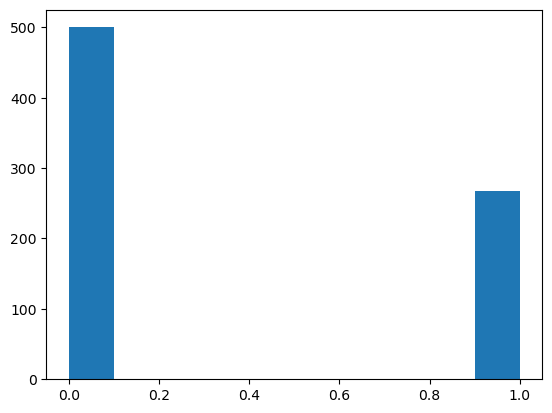

In [37]:
plt.hist(df['Outcome'])

In [39]:
labels=['Positive','Negative']

In [68]:
for i in df['Outcome']:
    if i==1:
        positive=positive+1
negative=df['Outcome'].count()- positive

In [102]:
counting=[positive,negative]
#df['Outcome'].count().where(df['Outcome']==1)
negative=(df['Outcome']==0).sum()
positive=(df['Outcome']==1).sum()

In [104]:
result=[positive,negative]

([<matplotlib.patches.Wedge at 0x135a32f90>,
 [Text(0.5025942326565439, 0.9784676986494649, 'Positive'),
  Text(-0.5025941410457839, -0.9784677457057288, 'Negative')],
 [Text(0.2741423087217512, 0.533709653808799, '34.9%'),
  Text(-0.27414225875224574, -0.533709679475852, '65.1%')])

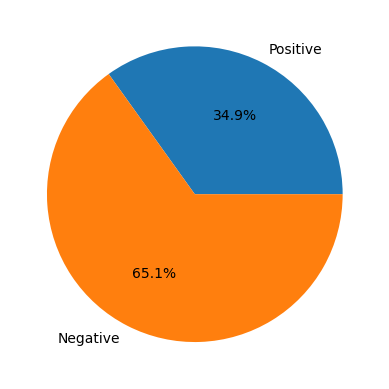

In [110]:
fig, ax = plt.subplots()
ax.pie(result, labels=labels,autopct='%1.1f%%')